# Advanced Programming for AI

# HW10 KNN & Decision Trees: Solutions

## For these problems use the following data set. It is a cleaned, ML-ready version of the "Poisonous mushroom" dataset from the UCI Machine learning repository.

In [131]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
dataset = 'https://raw.githubusercontent.com/JoeGanser/Mushroom_Classification/master/Code_Nodebooks/prepared_data.csv'
df = pd.read_csv(dataset,index_col=0)
X = df.drop('class',axis=1)
y = df['class']
df.head()

,class,cap-shape_b,cap-shape_c,cap-shape_k,cap-shape_s,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


# Problem 1: Make a class that grid searches to find the best model and does the following;
* It's inputs look like;

`best = best_classifier(model,X,y,parameters,metric='accuracy',test_size=0.2,cv=5)
`

* It returns the best scoring model, best scoring parameters and the best score
* It splits the data into a train and test set, running the grid search on the train set.
* It can change scoring methods in the grid search from
    * Accuracy
    * F1 score
    * Precision
    * Recall
* It has a `run()` method that prints and returns the best model, metrics and parameters

# HINT, the class should resemble this;


`from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,make_scorer`

`class best_classifier:
    def __init__(self,model,data,target,parameters,metric='accuracy',test_size=0.2,cv=5):
        self.model = model
        self.data = data
        self.target = target
        self.metric = metric.lower()
        self.parameters = parameters
        self.test_size=test_size
        self.cv=cv
        ....`

In [132]:
#code up your answer

# Problem 2

Using the results from problem 1, run `KNeighborsClassifier` and `DecisionTreeClassifier` for different parameters.

* Use the dataset above and values of `X` and `y`
* For `KNN` test different values of `n_neighbors`, `weights`, `p`
* For `DecisionTreeClassifier` test different values of `criterion`,`max_depth`,`max_features`

In [133]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [3,5,7,10]
weights = ['uniform','distance']
p=[2,1]
knn_parameters = {'n_neighbors':neighbors,'weights':weights,'p':p}

knn_best = best_classifier(KNeighborsClassifier(),X,y,knn_parameters)
knn_best.run()


from sklearn.tree import DecisionTreeClassifier
criterion=["gini","entropy","log_loss"]
max_depth = [3,5,10,None]
max_features = [None,2,"log2","auto","sqrt"]
dt_parameters = {'criterion':criterion,'max_depth':max_depth,'max_features':max_features}


dt_best = best_classifier(DecisionTreeClassifier(),X,y,dt_parameters)
dt_best.run()

Best Model: KNeighborsClassifier(n_neighbors=3)
Best parameters:  {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best score: 1.0
Best Model: DecisionTreeClassifier(criterion='entropy', max_features='log2')
Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2'}
Best score: 1.0


# Problem 3: 

### Modify the results of HW9 problem 1 to accept `best_classifier` as a parent class, and return a classification report on the best model from the grid search results in problem 2.

The class should look like this;
`r = binary_classification_report(KNeighborsClassifier(),X,y,knn_parameters)
r.report()`


### Hint the answer should resemble this;

`from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,log_loss,f1_score,roc_curve,auc,plot_confusion_matrix
import matplotlib.pyplot as plt
class binary_classification_report(best_classifier):
    def __init__(self,model,data,target,parameters,metric='accuracy',test_size=0.2,cv=5):
        #class inheritence, figure this part out
        #class inheritence, figure this part out
        self.best_model.fit(self.X_train,self.y_train)
        self.y_pred_test = self.best_model.predict(self.X_test)
        self.y_pred_proba_test = self.best_model.predict_proba(self.X_test)
        self.y_pred_train = self.best_model.predict(self.X_train)
        self.y_pred_proba_train = self.best_model.predict_proba(self.X_train)
        ....`

In [128]:
#code up your answer

## Problem 4: Using the same parameters in problem 2, run these values on the results of problem 3 to produce the binary classification report. The output should resemble this;

`binary_classification_report(model,X,y,parameters)`

Best Model: KNeighborsClassifier(n_neighbors=3)
Best parameters:  {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best score: 1.0

        Metrics for test set

        Accuracy Score: 1.0

        log loss: 9.992007221626413e-16

        f1 score: 1.0

        classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       829
           1       1.00      1.00      1.00       796

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



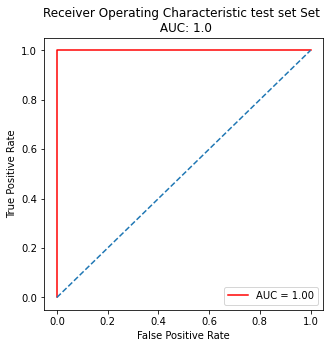

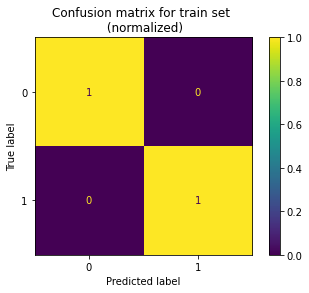


        Metrics for train set

        Accuracy Score: 1.0

        log loss: 9.992007221626413e-16

        f1 score: 1.0

        classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3379
           1       1.00      1.00      1.00      3120

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



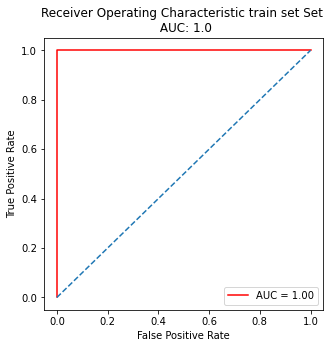

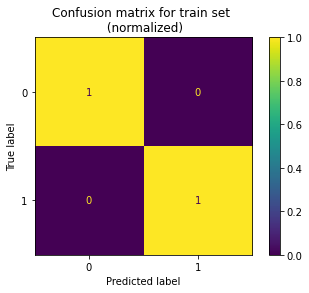

In [129]:
#code up your answer

Best Model: DecisionTreeClassifier(max_depth=10)
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': None}
Best score: 1.0

        Metrics for test set

        Accuracy Score: 1.0

        log loss: 9.992007221626413e-16

        f1 score: 1.0

        classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



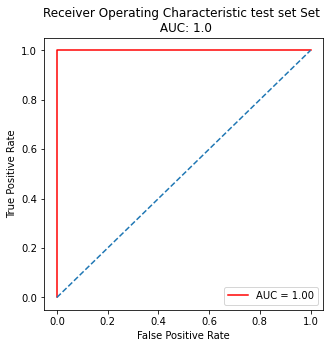

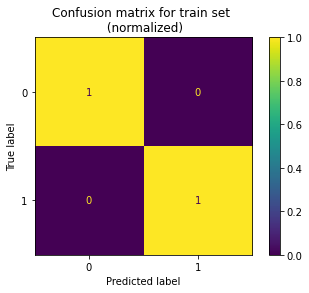


        Metrics for train set

        Accuracy Score: 1.0

        log loss: 9.992007221626413e-16

        f1 score: 1.0

        classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3357
           1       1.00      1.00      1.00      3142

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



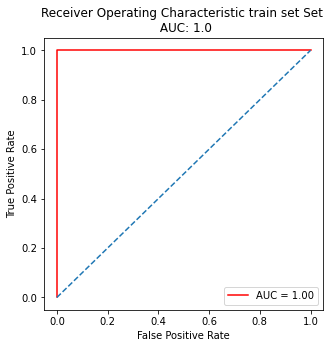

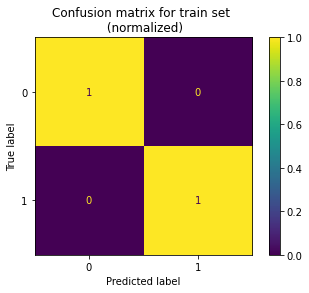

In [134]:
#code up your answer